<a href="https://colab.research.google.com/github/Venu2791/Deep-Vision/blob/master/Assignment3/1st_DNN_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras
!pip install -q keras-vis
import vis

Importing Different different classes in keras for building CNN

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Importing matplotlib and plotting a sample image from train dataset

(60000, 28, 28)


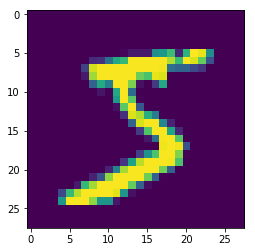

In [27]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])


Changing shape of the image to keep it in gray scale.


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Convert the data to float type

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [30]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

One - hot encoding of the output class.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [32]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

This code chunk creates sequential model by stacking convolutions to build CNN

Shape of channels in each layer

1. 28X28X1      | 3X3X1X32            -> 26X26X32 </br>
2. 26X26X1      | 1X1X32X10         -> 26X26X10</br> 
3. 26X26X10   | 26X26X10X10   -> 1X1X10</br>




In [33]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


When we see the model summary. The receptive field is 28, which is equal to  the size of the object. # of parameters is 68,000.

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


Model is complied here with adam optimizer and categorical_crossentropy is set as the loss function.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

**Model Fit:**

*   Model for 10 Epocs (iterations on entire dataset)

*  Each Epoch runs through the entire dataset once.

*  Batch size 32 refers to number of images at each step. So we have (60000/32)1875 steps in each epoch




    
    .

In [36]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.2608 - acc: 0.9264
Epoch 2/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0886 - acc: 0.9743
Epoch 3/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0626 - acc: 0.9815
Epoch 4/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0483 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0388 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0316 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0266 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0209 - acc: 0.9933
Epoch 9/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0176 - acc: 0.9947
Epoch 10/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0135 - a


**model.evaluate()**

  Returns loss value and metrics of test data



In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [38]:
print(score)

[0.08568911729380997, 0.9791]


In [0]:
y_pred = model.predict(X_test)

In [40]:
print(y_pred[:9])
print(y_test[:9])

[[9.60567209e-19 1.71668101e-17 8.79819221e-13 1.06684539e-09
  5.86821839e-21 2.00328798e-15 7.18376331e-25 1.00000000e+00
  1.91600967e-13 4.69725214e-12]
 [9.10109401e-12 3.36501205e-09 1.00000000e+00 9.42948289e-11
  8.29115177e-22 1.95250153e-11 1.18311601e-08 3.63435508e-23
  8.81441323e-14 3.80413061e-20]
 [1.28448889e-07 9.99864817e-01 4.65513585e-05 1.93645588e-09
  4.23989377e-06 1.93846091e-07 9.72598500e-08 8.03534931e-05
  3.54604185e-06 1.22478735e-10]
 [9.99998808e-01 8.34638023e-13 1.04295043e-06 3.61432184e-13
  3.23466907e-14 5.20375030e-13 9.63909841e-08 1.10355294e-10
  1.43877044e-12 1.33067559e-12]
 [1.04686648e-10 8.61447112e-12 5.98737282e-09 1.66117198e-09
  9.99999642e-01 6.23989140e-15 1.62235191e-11 3.07626769e-09
  1.34822313e-08 2.89780132e-07]
 [3.54168450e-09 9.96649206e-01 4.24602467e-06 1.90383642e-09
  1.82235294e-06 7.35042249e-10 1.84450144e-09 3.34083126e-03
  3.80045412e-06 8.74437356e-10]
 [2.44420515e-16 5.90183724e-09 9.55767791e-06 4.52239329e

***Problem Statement:***

The task is to get 99.4% validation accuracy in the model.


**Constraints:**

*   Number of parameters should be less than 20000.
*   Do not train the model for more than 15 epochs
*   Do not use regularization techniques like Dropout or even LI, L2 regularization




**Shape of channels in each layer**

1.  28X28X1      | 3X3X1X8        -> 26X26X8 </br>
2.  26X26X1      | 3X3X8X16       -> 24X24X16</br> 
3.  24X24X16     | 3X3X16X 32     -> 22X22X32</br>
4.  22X22X32     ->maxpooling     -> 11X11X32</br>
5.  11X11X32     | 1X1X32X10      -> 11X11X10</br>
6.  11X11X10     | 3X3X10X16      -> 9X9X16</br>
7.  9X9X16       | 3X3X16X16      -> 7X7X16</br>
8.  7X7X16       | 1X1X16X10      -> 7X7X10</br>
9.  7X7X10       | 7X7X10X10      ->1X1X10   




In [41]:
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 28X28X1 | 3X3X1X8 -> 26X26X8 | GRF - 3
#CONVOLUTION BLOCK 1 BEGINS
model.add(Convolution2D(16, 3,3, activation='relu')) #24X24X8 | 3X3X8X16 -> 22X22X16 | GRF - 7
#CONVOLUTION BLOCK 1 ENDS
model.add(Convolution2D(32, 3,3, activation='relu')) #24X24X16 | 3X3X16X32 -> 22X22X32 | GRF - 7
#CONVOLUTION BLOCK 1 ENDS

#TRANSITION BLOCK 1 BEGINS
model.add(MaxPooling2D(pool_size=(2, 2)))            #24X24X32 ->Max Pooling -> 11X11X32 | GRF - 14
model.add(Convolution2D(10, 1, activation='relu'))   #11X11X32 | 1X1X10 -> 11X11X10 | GRF - 14
#TRANSITION BLOCK 1 ENDS

#CONVOLUTION BLOCK 2 BEGINS
model.add(Convolution2D(16, 3,3, activation='relu')) #11X11X10 | 3X3X10X16 -> 9X9X16 GRF -16
model.add(Convolution2D(16, 3,3, activation='relu')) #9X9X16   | 3X3X16X16 -> 7X7X16 GRF -18
model.add(Convolution2D(10, 1, activation='relu'))   #7X7X10   | 1X1X10X10 -> 7X7X10 GRF-18
model.add(Convolution2D(10, 7,7))                    #7X7X10   | 3X3X10X10 -> 1X1X10 GRF-24
#CONVOLUTION BLOCK 2 ENDS

#model.add(Convolution2D(24, 3,3,activation='relu'))
#model.add(Convolution2D(10, 3,3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dis

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 10)        330       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 16)          2320      
__________

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

**Model.compile()**

**Loss Function:** A loss function is used to optimize the parameter values in a neural network model. Loss functions map a set of parameter values for the network onto a scalar value that indicates how well those parameter accomplish the task the network is intended to do.

**Optimizer:** This step selects an optimizer algorithm that manipulates the learning rate per time-step so as to update the weights in a manner that does not lead to a swinging behaviour around the minimum



In [0]:
optimizer = optimizer=keras.optimizers.adam(lr=.001)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [45]:
model.fit(X_train, Y_train,  batch_size=64, validation_data=(X_test,Y_test),nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 14s 231us/step - loss: 0.2479 - acc: 0.9242 - val_loss: 0.0691 - val_acc: 0.9767
Epoch 2/15
60000/60000 [==============================] - 13s 216us/step - loss: 0.0750 - acc: 0.9774 - val_loss: 0.0424 - val_acc: 0.9856
Epoch 3/15
60000/60000 [==============================] - 13s 216us/step - loss: 0.0559 - acc: 0.9825 - val_loss: 0.0428 - val_acc: 0.9855
Epoch 4/15
60000/60000 [==============================] - 13s 216us/step - loss: 0.0445 - acc: 0.9860 - val_loss: 0.0379 - val_acc: 0.9872
Epoch 5/15
60000/60000 [==============================] - 13s 215us/step - loss: 0.0397 - acc: 0.9880 - val_loss: 0.0465 - val_acc: 0.9849
Epoch 6/15
60000/60000 [==============================] - 13s 216us/step - loss: 0.0329 - acc: 0.9899 - val_loss: 0.0410 - val_acc: 0.9872
Epoch 7/15
60000/60000 [==============================] - 13s 217us/step - loss: 0.0309 - acc: 0.9903 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)[1]

In [47]:
print(score)

0.9894


**Image Augumentation:**

The simplest way to reduce overfitting is to increase the size of the training data. In machine learning, we were not able to increase the size of training data as the labeled data was too costly. 

Data augmentation is a technique to artificially create new training data from existing training data.Image data augmentation is perhaps the most well-known type of data augmentation and involves creating transformed versions of images in the training dataset that belong to the same class as the original image.Transforms include a range of operations from the field of image manipulation, such as shifts, flips, zooms, and much more.Example : A horizontal flip of a picture of a cat may make sense, because the photo could have been taken from the left or right.


**Note:** *Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset.*

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(X_train)

**Callbacks:**

The callbacks operate separately from the optimization algorithm, although they adjust the learning rate used by the optimization algorithm. Callbacks are instantiated and configured, then specified in a list to the “callbacks” argument of the fit() function when training the model.

Here, we have used callbacks for two reasons:



*   Early Stopping once we achieve a validation accuracy of 99.41%.
*   Display the Validation Loss and Validation Accuracy.



In [0]:
from keras import callbacks
from keras.callbacks import ProgbarLogger
class ValOnlyProgbarLogger(ProgbarLogger):
    def __init__(self, verbose, count_mode='steps'):
        # Ignore the `verbose` argument specified in `fit()` and pass `count_mode` upstream
        self.verbose = verbose
        super(ValOnlyProgbarLogger, self).__init__(count_mode)

    def on_train_begin(self, logs=None):
        # filter out the training metrics
        self.params['metrics'] = [m for m in self.params['metrics'] if m.startswith('val_')]
        self.epochs = self.params['epochs']

class EarlyStopByacc(keras.callbacks.Callback):
    def __init__(self, value = 0, verbose = 0):
        super(keras.callbacks.Callback, self).__init__()
        self.value = value
        self.verbose = verbose


    def on_epoch_end(self, epoch, logs={}):
         score = model.evaluate(X_test, Y_test, verbose=0)[1]
         if score > self.value:
            print("Epoch %05d: early stopping Threshold" % epoch)
            self.model.stop_training = True

**Model.fit_generator:**
 
In fit_generator we generate 750(steps_per_epoch) * 512 (batch_size) =  384,000 images for each epoch.

One great advantage about fit_generator() besides saving memory is user can integrate random augmentation inside the generator, so it will always provide model with new data to train on the fly.

**flow()** : The ImageDataGenerator object has a method called flow that takes three parameters - Training Images(Xs), Training Labels (Ys) and a batch size - and returns a python generator that yields batch of batch_size elements picked from the training images and therafter transformed randomly according to the parameters passed to the ImageDataGenerator object.

In [50]:
       
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=512),validation_data=(X_test,Y_test),steps_per_epoch=750, epochs=15,verbose=0, callbacks=[ValOnlyProgbarLogger(verbose=1),EarlyStopByacc(value = .994, verbose =1)])


Epoch 1/15
750/750 [==============================] - 113s 150ms/step - val_loss: 0.0270 - val_acc: 0.9922
Epoch 2/15
750/750 [==============================] - 111s 147ms/step - val_loss: 0.0213 - val_acc: 0.9936
Epoch 3/15
750/750 [==============================] - 111s 148ms/step - val_loss: 0.0228 - val_acc: 0.9924
Epoch 4/15
750/750 [==============================] - 112s 149ms/step - val_loss: 0.0204 - val_acc: 0.9939
Epoch 5/15
750/750 [==============================] - 112s 149ms/step - val_loss: 0.0204 - val_acc: 0.9932
Epoch 6/15
750/750 [==============================] - 114s 152ms/step - val_loss: 0.0193 - val_acc: 0.9941
Epoch 00005: early stopping Threshold


In [51]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 107us/step


In [52]:
print(score)

[0.019341330530797132, 0.9941]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

**Kernel Extract (Feature Maps):**

The below code is to visualize the extract of the kernel of each layer from the convolution layer. With this we could find when the edges are formed so that max pooling could be exactly applied at that point. 

{'conv2d_15': <keras.layers.convolutional.Conv2D object at 0x7f1190353048>, 'conv2d_16': <keras.layers.convolutional.Conv2D object at 0x7f11903530b8>, 'conv2d_17': <keras.layers.convolutional.Conv2D object at 0x7f1190353198>, 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D object at 0x7f11902dcdd8>, 'conv2d_18': <keras.layers.convolutional.Conv2D object at 0x7f11903533c8>, 'conv2d_19': <keras.layers.convolutional.Conv2D object at 0x7f11902dc908>, 'conv2d_20': <keras.layers.convolutional.Conv2D object at 0x7f1190270f60>, 'conv2d_21': <keras.layers.convolutional.Conv2D object at 0x7f119028b048>, 'conv2d_22': <keras.layers.convolutional.Conv2D object at 0x7f1190222550>, 'flatten_4': <keras.layers.core.Flatten object at 0x7f119024d940>, 'activation_4': <keras.layers.core.Activation object at 0x7f119024de80>}


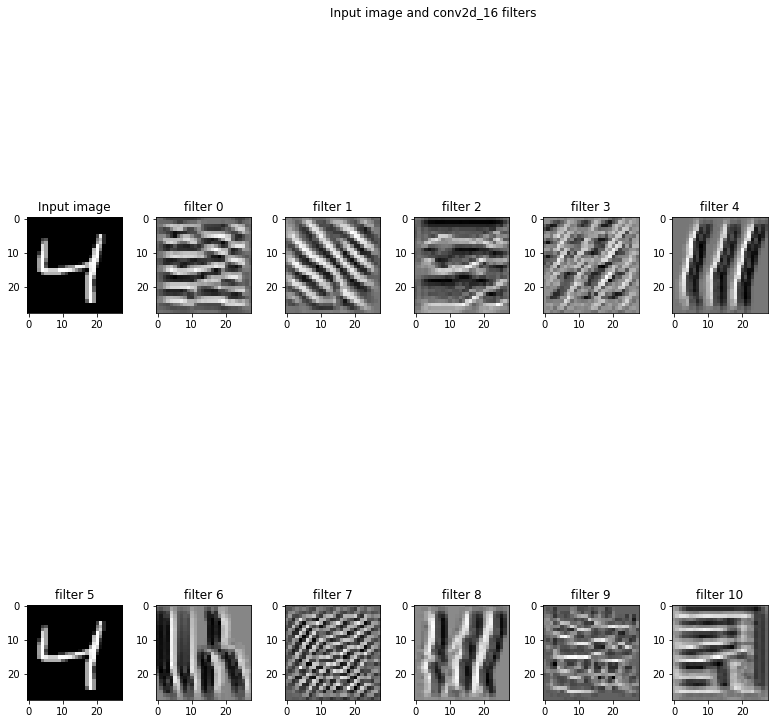

In [53]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K

layer_dict = dict([(layer.name, layer) for layer in model.layers])
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_16'):
  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()